In [1]:
import mysql.connector

# Replace 'your_username', 'your_password', 'your_host', and 'your_database' with your actual MySQL credentials
db_config = {
    'user': 'root',
    'password': '11111111',
    'host': 'localhost',
    'database': 'NAD_test',
}

# Establish a connection
conn = mysql.connector.connect(**db_config)

# Create a cursor to execute SQL queries
cursor = conn.cursor()

# Example query: Fetch all rows from a table
cursor.execute("SELECT * FROM Fabric_information")
rows = cursor.fetchall()

# Display the fetched rows
for row in rows:
    print(row)
    
    
# Example query: Fetch all rows from a table
cursor.execute("SELECT * FROM Defect_information")
rows = cursor.fetchall()

# Display the fetched rows
for row in rows:
    print(row)

# Close the cursor and connection
cursor.close()
conn.close()

('F001', 100, 5, datetime.datetime(2023, 11, 6, 21, 36, 16), datetime.datetime(2023, 10, 27, 12, 0), '/images/fabric1.jpg', 'complete')
('F002', 120, 8, datetime.datetime(2023, 11, 6, 21, 36, 16), datetime.datetime(2023, 10, 27, 13, 30), '/images/fabric2.jpg', 'complete')
('F003', 150, 12, datetime.datetime(2023, 11, 6, 21, 36, 16), datetime.datetime(2023, 10, 27, 15, 0), '/images/fabric3.jpg', 'complete')
('F004', 80, 3, datetime.datetime(2023, 11, 6, 21, 36, 16), None, '/images/fabric4.jpg', 'running')
('F005', 200, 15, datetime.datetime(2023, 11, 6, 21, 36, 16), None, '/images/fabric5.jpg', 'running')
('F006', 90, 7, datetime.datetime(2023, 11, 6, 21, 36, 16), datetime.datetime(2023, 10, 27, 14, 0), '/images/fabric6.jpg', 'complete')
('F007', 110, 10, datetime.datetime(2023, 11, 6, 21, 36, 16), None, '/images/fabric7.jpg', 'running')
('F008', 130, 9, datetime.datetime(2023, 11, 6, 21, 36, 16), datetime.datetime(2023, 10, 27, 16, 0), '/images/fabric8.jpg', 'complete')
('F009', 95, 6,

In [2]:
from tabulate import tabulate
conn = mysql.connector.connect(**db_config)

cursor = conn.cursor()


cursor.execute("SELECT * FROM Fabric_information")
Fabric_information_rows = cursor.fetchall()

# fabric_information table
print("Fabric Information Table:")
print(tabulate(Fabric_information_rows, headers=cursor.column_names))


cursor.execute("SELECT * FROM Defect_information")
Defect_information_rows = cursor.fetchall()

# bad_information table
print("\n Defect Information Table:")
print(tabulate(Defect_information_rows, headers=cursor.column_names))


cursor.close()
conn.close()

Fabric Information Table:
fabric_code      total_tests    defects_detected  scan_start_time      test_end_time        image_path            status
-------------  -------------  ------------------  -------------------  -------------------  --------------------  --------
F001                     100                   5  2023-11-06 21:36:16  2023-10-27 12:00:00  /images/fabric1.jpg   complete
F002                     120                   8  2023-11-06 21:36:16  2023-10-27 13:30:00  /images/fabric2.jpg   complete
F003                     150                  12  2023-11-06 21:36:16  2023-10-27 15:00:00  /images/fabric3.jpg   complete
F004                      80                   3  2023-11-06 21:36:16                       /images/fabric4.jpg   running
F005                     200                  15  2023-11-06 21:36:16                       /images/fabric5.jpg   running
F006                      90                   7  2023-11-06 21:36:16  2023-10-27 14:00:00  /images/fabric6.jpg   com

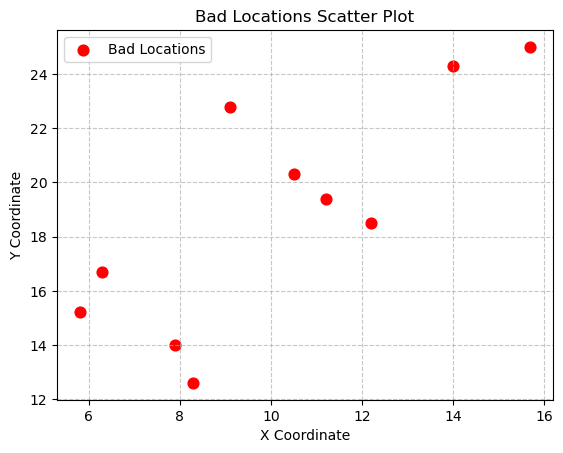

In [3]:
import matplotlib.pyplot as plt
conn = mysql.connector.connect(**db_config)

cursor = conn.cursor()


cursor.execute("SELECT x_coordinate, y_coordinate FROM Defect_information")
bad_locations = cursor.fetchall()

cursor.close()
conn.close()

x_coordinates, y_coordinates = zip(*bad_locations)


plt.scatter(x_coordinates, y_coordinates, color='red', marker='o', s=60, label='Bad Locations')
plt.title('Bad Locations Scatter Plot')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

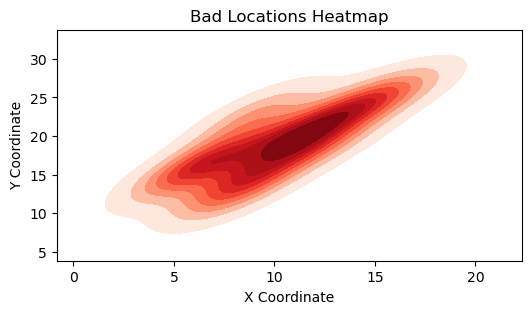

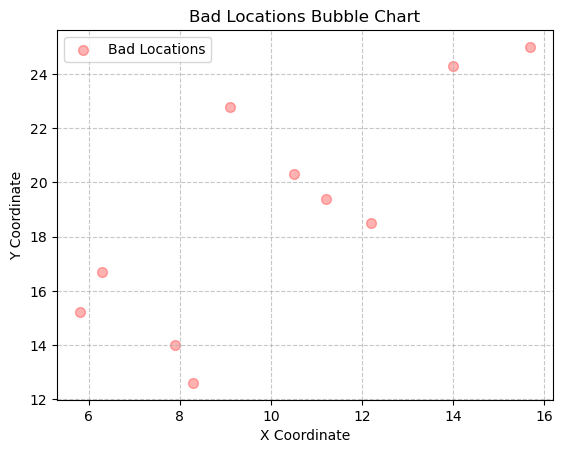

In [4]:
import seaborn as sns

conn = mysql.connector.connect(**db_config)


cursor = conn.cursor()

cursor.execute("SELECT x_coordinate, y_coordinate FROM Defect_information")
bad_locations = cursor.fetchall()

cursor.close()
conn.close()

x_coordinates, y_coordinates = zip(*bad_locations)

plt.figure(figsize=(6,3))
sns.kdeplot(x=x_coordinates, y=y_coordinates, cmap="Reds", fill=True)
plt.title('Bad Locations Heatmap')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.show()


plt.scatter(x_coordinates, y_coordinates, c='red', alpha=0.3, s=50, label='Bad Locations')
plt.title('Bad Locations Bubble Chart')
plt.xlabel('X Coordinate')
plt.ylabel('Y Coordinate')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()



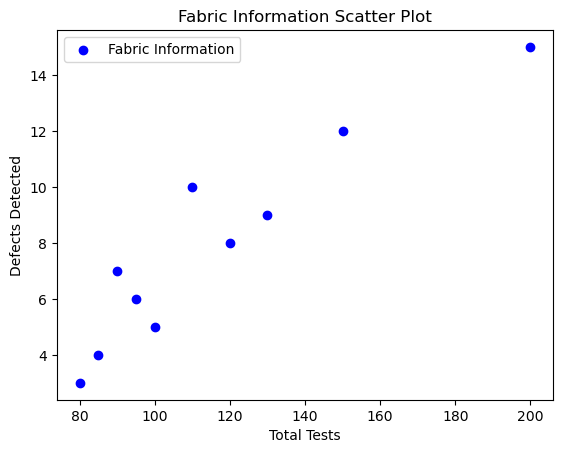

In [5]:
# Establish a connection
conn = mysql.connector.connect(**db_config)

# Create a cursor to execute SQL queries
cursor = conn.cursor()

# Fetch data from Fabric_information table
cursor.execute("SELECT fabric_code, total_tests, defects_detected FROM Fabric_information")
fabric_data = cursor.fetchall()

# Unpack the data for plotting
fabric_codes, total_tests, defects_detected = zip(*fabric_data)

# Scatter plot for Fabric_information
plt.scatter(total_tests, defects_detected, color='blue', label='Fabric Information')
plt.title('Fabric Information Scatter Plot')
plt.xlabel('Total Tests')
plt.ylabel('Defects Detected')
plt.legend()
plt.show()

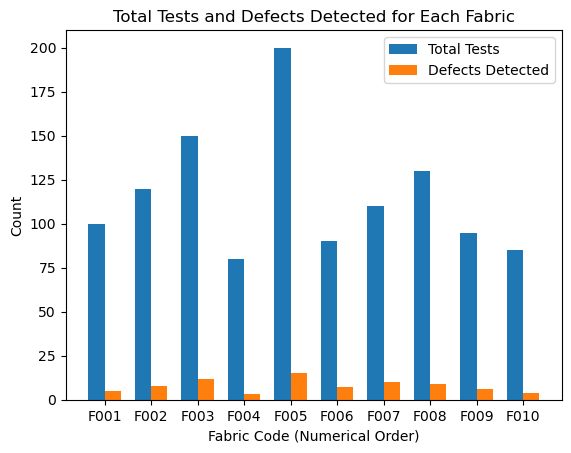

In [6]:

conn = mysql.connector.connect(**db_config)

cursor = conn.cursor()

cursor.execute("SELECT fabric_code, total_tests, defects_detected FROM fabric_information")
fabric_info = cursor.fetchall()


cursor.close()
conn.close()


fabric_info_sorted = sorted(fabric_info, key=lambda x: x[0])

fabric_codes, total_tests, defects_detected = zip(*fabric_info_sorted)


fig, ax = plt.subplots()
bar_width = 0.35
bar1 = ax.bar(range(1, len(fabric_codes) + 1), total_tests, bar_width, label='Total Tests')
bar2 = ax.bar([code + bar_width for code in range(1, len(fabric_codes) + 1)], defects_detected, bar_width, label='Defects Detected')

ax.set_xlabel('Fabric Code (Numerical Order)')
ax.set_ylabel('Count')
ax.set_title('Total Tests and Defects Detected for Each Fabric')
ax.set_xticks([code + bar_width / 2 for code in range(1, len(fabric_codes) + 1)])
ax.set_xticklabels(fabric_codes)
ax.legend()

plt.show()


In [17]:

def connect():
    return mysql.connector.connect(**db_config)

def add_fabric_information():
    fabric_code = input("Enter fabric code: ")
    total_tests = int(input("Enter total tests: "))
    defects_detected = int(input("Enter defects detected: "))
    test_end_time = input("Enter test end time (YYYY-MM-DD HH:mm:ss): ")
    image_path = input("Enter image path: ")
    status = input("Enter status: ")

    connection = connect()
    cursor = connection.cursor()

    query = "INSERT INTO Fabric_information (fabric_code, total_tests, defects_detected, test_end_time, image_path, status) VALUES (%s, %s, %s, %s, %s, %s)"
    values = (fabric_code, total_tests, defects_detected, test_end_time, image_path, status)

    cursor.execute(query, values)
    connection.commit()

    cursor.close()
    connection.close()
    print("Fabric information added successfully!")

def delete_fabric_information():
    fabric_code = input("Enter fabric code to delete: ")

    connection = connect()
    cursor = connection.cursor()

    query = "DELETE FROM Fabric_information WHERE fabric_code = %s"
    values = (fabric_code,)

    cursor.execute(query, values)
    connection.commit()

    cursor.close()
    connection.close()
    print(f"Fabric information with code {fabric_code} deleted successfully!")

def lookup_fabric_information():
    fabric_code = input("Enter fabric code to look up: ")

    connection = connect()
    cursor = connection.cursor()

    query = "SELECT * FROM Fabric_information WHERE fabric_code = %s"
    values = (fabric_code,)

    cursor.execute(query, values)
    fabric_data = cursor.fetchall()

    cursor.close()
    connection.close()

    if fabric_data:
        print("Fabric Information:")
        for row in fabric_data:
            print(row)
    else:
        print(f"No fabric information found for code {fabric_code}")

# Receive command input from the user (add , delete, lookup)
command = input("Enter a command (add, delete, lookup): ").lower().strip()

if not command:
    print("Please enter a valid command.")
elif command == 'add':
    add_fabric_information()
elif command == 'delete':
    delete_fabric_information()
elif command == 'lookup':
    lookup_fabric_information()
else:
    print("Invalid command. Please enter 'add', 'delete', or 'lookup'.")


Fabric Information:
('F001', 100, 5, datetime.datetime(2023, 11, 6, 21, 36, 16), datetime.datetime(2023, 10, 27, 12, 0), '/images/fabric1.jpg', 'complete')
